In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

In [3]:
# Load AG News dataset
df = pd.read_csv("../data/ag_news_train.csv") 

In [4]:
df.head()

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
df.shape

(120000, 3)

In [7]:
# Merge title + description into one text column
df['text'] = (df['title'].fillna('') + " " + df['description'].fillna('')).str.lower()

In [8]:
df.head()

,label,title,description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st. bears claw back into the black (reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace (reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks' outlook (reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","oil prices soar to all-time record, posing new..."


In [11]:
# remove links and extra spaces
df['text'] = df['text'].apply(lambda x: re.sub(r"http\S+|www\.\S+", " ", str(x)))
df['text'] = df['text'].str.replace(r"\s+", " ", regex=True).str.strip()

In [12]:
# Split into train/val
X_train, X_val, y_train, y_val = train_test_split(
    df['text'], df['label'], test_size=0.16666, stratify=df['label'], random_state=42)

In [13]:
print("Train size:", len(X_train), "Validation size:", len(X_val))
print("Classes:", df['label'].unique())

Train size: 100000 Validation size: 20000
Classes: [3 4 2 1]


In [19]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [15]:
y_train_enc_df = pd.Series(y_train).copy()
y_val_enc_df   = pd.Series(y_val).copy()

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_enc_df)
y_val_enc   = le.transform(y_val_enc_df)

In [16]:
print("Classes:", list(le.classes_))
print("Encoded sample:", y_train_enc[:10])

Classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Encoded sample: [0 1 3 2 2 0 3 3 2 2]


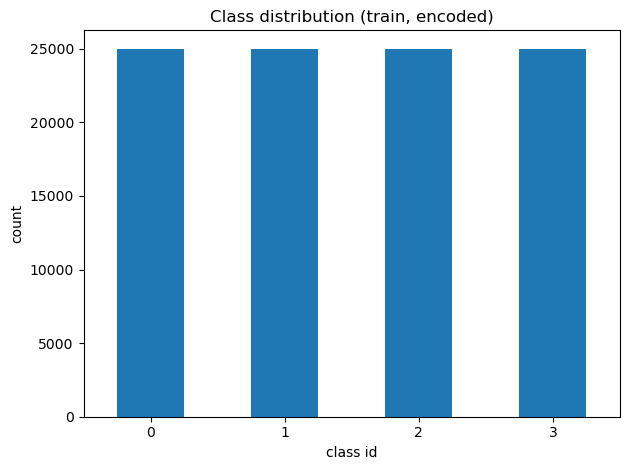

In [20]:
# EDA: class balance
ax = pd.Series(y_train_enc).value_counts().sort_index().plot(kind='bar', rot=0)
ax.set_title("Class distribution (train, encoded)")
ax.set_xlabel("class id"); ax.set_ylabel("count")
plt.tight_layout(); plt.show()